In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import numpy as np
import laminate

╒════════════════════════════════╤════════════════════════════════╤══════════════════════════════════╕
│ A Matrix                       │ B Matrix                       │ D Matrix                         │
╞════════════════════════════════╪════════════════════════════════╪══════════════════════════════════╡
│ [[8.27e+05 6.63e+04 0.00e+00]  │ [[0.00e+00 -1.16e-10 0.00e+00] │ [[6.35e+08 1.56e+08 -7.32e+06]   │
│  [6.63e+04 1.17e+05 0.00e+00]  │  [-1.16e-10 0.00e+00 0.00e+00] │  [1.56e+08 2.57e+08 -7.32e+06]   │
│  [0.00e+00 0.00e+00 1.35e+05]] │  [0.00e+00 0.00e+00 0.00e+00]] │  [-3.66e+06 -3.66e+06 2.55e+08]] │
╘════════════════════════════════╧════════════════════════════════╧══════════════════════════════════╛
╒════════════╤══════════╕
│ Property   │    Value │
╞════════════╪══════════╡
│ Ex         │ 6890     │
├────────────┼──────────┤
│ Ey         │  976     │
├────────────┼──────────┤
│ Gxy        │ 1120     │
├────────────┼──────────┤
│ vxy        │    0.566 │
╘════════════╧═════

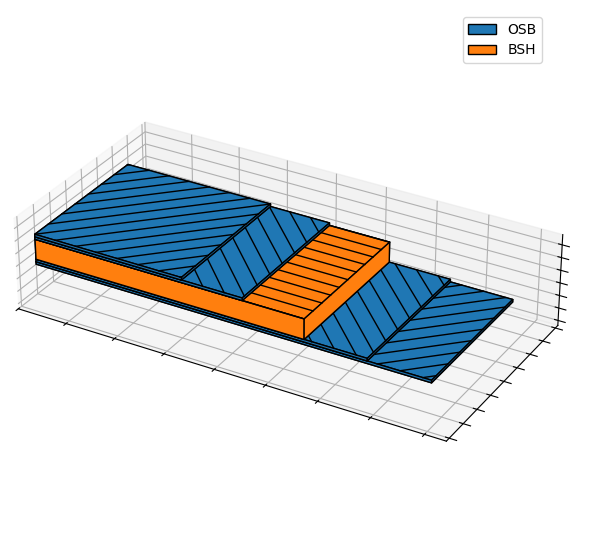

In [2]:
layers = [
    {'name': "OSB", 'E1': 3230, 'E2': 2550, 'G12': 920, 'v12': 0.3, 'theta':  45, 'thickness': 10},
    {'name': "OSB", 'E1': 3230, 'E2': 2550, 'G12': 920, 'v12': 0.3, 'theta': -45, 'thickness': 10},
    {'name': "BSH", 'E1': 9100, 'E2':  250, 'G12': 540, 'v12': 0.3, 'theta':   0, 'thickness': 80},
    {'name': "OSB", 'E1': 3230, 'E2': 2550, 'G12': 920, 'v12': 0.3, 'theta': -45, 'thickness': 10},
    {'name': "OSB", 'E1': 3230, 'E2': 2550, 'G12': 920, 'v12': 0.3, 'theta':  45, 'thickness': 10}
]

Lam = laminate.Laminate(layers)
Lam.print_results()
Lam.plot()

````python
layers = [
    {'name': "SR-Grid", 'E1':  215e3, 'E2': 215e3, 'G12':     0, 'v12': 0.30, 'theta': 45, 'thickness':   5},
    {'name':      "MB", 'E1': 10.8e3, 'E2': 5.4e3, 'G12': 4.5e3, 'v12': 0.26, 'theta':  0, 'thickness': 175}
]
````

In [3]:
laminate_analysis = laminate.LaminateLoadAnalysis(Lam)

midplane_strains, midplane_curvatures = laminate_analysis.apply_load(Nx=100, Ny=0, Nxy=0)

ply_strains, ply_stresses = laminate_analysis.compute_ply_stresses_strains(midplane_strains, midplane_curvatures)

laminate_analysis.print_ply_results(ply_strains, ply_stresses)


strains per layer:
╒═════════╤══════════╤═══════════╤═══════════╕
│   layer │     e_xx │      e_yy │      e_xy │
╞═════════╪══════════╪═══════════╪═══════════╡
│       1 │ 0.000127 │ -7.17e-05 │ -3.55e-23 │
├─────────┼──────────┼───────────┼───────────┤
│       2 │ 0.000127 │ -7.17e-05 │ -2.9e-23  │
├─────────┼──────────┼───────────┼───────────┤
│       3 │ 0.000127 │ -7.17e-05 │  0        │
├─────────┼──────────┼───────────┼───────────┤
│       4 │ 0.000127 │ -7.17e-05 │  2.9e-23  │
├─────────┼──────────┼───────────┼───────────┤
│       5 │ 0.000127 │ -7.17e-05 │  3.55e-23 │
╘═════════╧══════════╧═══════════╧═══════════╛

stresses per layer:
╒═════════╤════════╤══════════╤═════════╕
│   layer │   s_xx │     s_yy │    t_xy │
╞═════════╪════════╪══════════╪═════════╡
│       1 │  0.199 │  0.0169  │ -0.0101 │
├─────────┼────────┼──────────┼─────────┤
│       2 │  0.199 │  0.0169  │  0.0101 │
├─────────┼────────┼──────────┼─────────┤
│       3 │  1.15  │ -0.00845 │  0      │
├─────────┼─

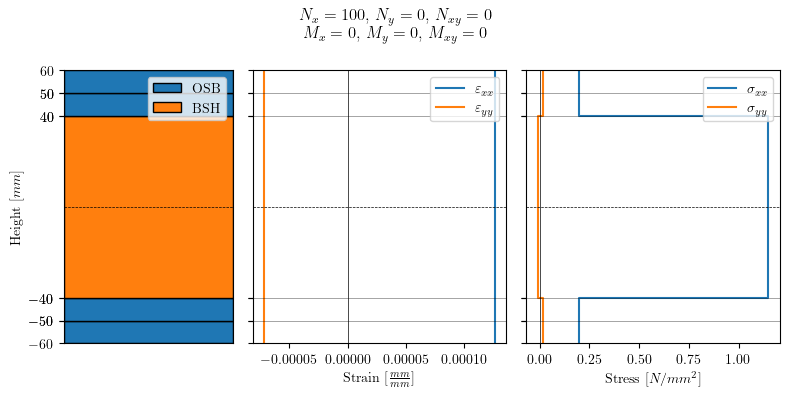

In [4]:
laminate_analysis.plot_stress_strain_variation()